# Imports

In [1]:
import json
import shutil
from pathlib import Path
from pyodi.apps.paint_annotations import paint_annotations
from pyodi.apps.ground_truth import ground_truth
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [2]:
DATA_DIR = Path('../data/american-sign-lang-letters-coco')

# Explore the training dataset

## Read the training COCO JSON file

In [3]:
with open(DATA_DIR / 'train' / '_annotations.coco.json', 'r') as f:
    train_coco_json = json.load(f)

## Explore keys of training COCO JSON file

In [4]:
train_coco_json.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [5]:
train_coco_json['info']

{'year': '2022',
 'version': '6',
 'description': 'Exported from roboflow.ai',
 'contributor': 'David Lee',
 'url': 'https://public.roboflow.ai/object-detection/american-sign-language-letters',
 'date_created': '2022-03-17T03:48:53+00:00'}

In [6]:
train_coco_json['licenses']

[{'id': 1,
  'url': 'https://creativecommons.org/publicdomain/zero/1.0/',
  'name': 'Public Domain'}]

In [7]:
train_coco_json['categories']

[{'id': 0, 'name': 'Letters', 'supercategory': 'none'},
 {'id': 1, 'name': 'A', 'supercategory': 'Letters'},
 {'id': 2, 'name': 'B', 'supercategory': 'Letters'},
 {'id': 3, 'name': 'C', 'supercategory': 'Letters'},
 {'id': 4, 'name': 'D', 'supercategory': 'Letters'},
 {'id': 5, 'name': 'E', 'supercategory': 'Letters'},
 {'id': 6, 'name': 'F', 'supercategory': 'Letters'},
 {'id': 7, 'name': 'G', 'supercategory': 'Letters'},
 {'id': 8, 'name': 'H', 'supercategory': 'Letters'},
 {'id': 9, 'name': 'I', 'supercategory': 'Letters'},
 {'id': 10, 'name': 'J', 'supercategory': 'Letters'},
 {'id': 11, 'name': 'K', 'supercategory': 'Letters'},
 {'id': 12, 'name': 'L', 'supercategory': 'Letters'},
 {'id': 13, 'name': 'M', 'supercategory': 'Letters'},
 {'id': 14, 'name': 'N', 'supercategory': 'Letters'},
 {'id': 15, 'name': 'O', 'supercategory': 'Letters'},
 {'id': 16, 'name': 'P', 'supercategory': 'Letters'},
 {'id': 17, 'name': 'Q', 'supercategory': 'Letters'},
 {'id': 18, 'name': 'R', 'supercate

In [8]:
train_coco_json['images'][:2]

[{'id': 0,
  'license': 1,
  'file_name': 'F28_jpg.rf.daced698e6298e2163de0a4b1f5fe0dd.jpg',
  'height': 2048,
  'width': 1536,
  'date_captured': '2022-03-17T03:48:53+00:00'},
 {'id': 1,
  'license': 1,
  'file_name': 'N11_jpg.rf.da6cc9992f27bf11a78d020ced7cbd8c.jpg',
  'height': 2048,
  'width': 1536,
  'date_captured': '2022-03-17T03:48:53+00:00'}]

In [9]:
train_coco_json['annotations'][:2]

[{'id': 0,
  'image_id': 0,
  'category_id': 6,
  'bbox': [437, 397, 643, 1237],
  'area': 795391,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 1,
  'category_id': 14,
  'bbox': [445, 777, 390, 471],
  'area': 183690,
  'segmentation': [],
  'iscrowd': 0}]

## Use pyodi for dataset exploration

In [10]:
pyodi_save_dir = Path('paint-result')

### Explore ground truth bounding boxes

In [11]:
paint_annotations(DATA_DIR / 'train' / '_annotations.coco.json', DATA_DIR / 'train', pyodi_save_dir, first_n=10)

2022-10-04 12:29:01.017 | INFO     | pyodi.apps.paint_annotations:paint_annotations:99 - Loading F28_jpg.rf.daced698e6298e2163de0a4b1f5fe0dd.jpg
2022-10-04 12:29:01.090 | INFO     | pyodi.apps.paint_annotations:paint_annotations:164 - Saving paint-result/F28_jpg.rf.daced698e6298e2163de0a4b1f5fe0dd_result.jpg
2022-10-04 12:29:01.452 | INFO     | pyodi.apps.paint_annotations:paint_annotations:99 - Loading N11_jpg.rf.da6cc9992f27bf11a78d020ced7cbd8c.jpg
2022-10-04 12:29:01.502 | INFO     | pyodi.apps.paint_annotations:paint_annotations:164 - Saving paint-result/N11_jpg.rf.da6cc9992f27bf11a78d020ced7cbd8c_result.jpg
2022-10-04 12:29:01.847 | INFO     | pyodi.apps.paint_annotations:paint_annotations:99 - Loading Y3_jpg.rf.dc60336114e301e2de71eeb93eff70bc.jpg
2022-10-04 12:29:01.899 | INFO     | pyodi.apps.paint_annotations:paint_annotations:164 - Saving paint-result/Y3_jpg.rf.dc60336114e301e2de71eeb93eff70bc_result.jpg
2022-10-04 12:29:02.255 | INFO     | pyodi.apps.paint_annotations:paint_

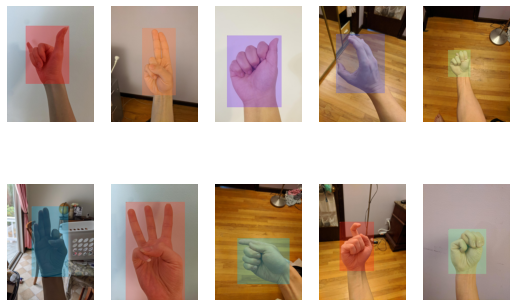

In [12]:
fig, axs = plt.subplots(2, 5, figsize=(9, 6))
for i, p in enumerate(pyodi_save_dir.glob('*.jpg')):
    annotated_img = cv2.cvtColor(cv2.imread(str(p)), cv2.COLOR_BGR2RGB)
    axs[i // 5][i % 5].imshow(annotated_img)
    axs[i // 5][i % 5].axis('off')

fig.savefig(pyodi_save_dir / 'annotated_images.png')
plt.show()

### Explore dataset characteristics

In [13]:
ground_truth(DATA_DIR / 'train' / '_annotations.coco.json', show=False, output=pyodi_save_dir, output_size=(1280, 720))

2022-10-04 12:29:29.259 | INFO     | pyodi.core.utils:coco_ground_truth_to_df:38 - Loading Ground Truth File
2022-10-04 12:29:29.265 | INFO     | pyodi.core.utils:coco_ground_truth_to_df:48 - Converting COCO Ground Truth to pd.DataFrame
2022-10-04 12:29:29.290 | INFO     | pyodi.plots.common:plot_scatter_with_histograms:61 - Plotting Scatter with Histograms
2022-10-04 12:29:31.156 | INFO     | pyodi.plots.common:plot_scatter_with_histograms:61 - Plotting Scatter with Histograms


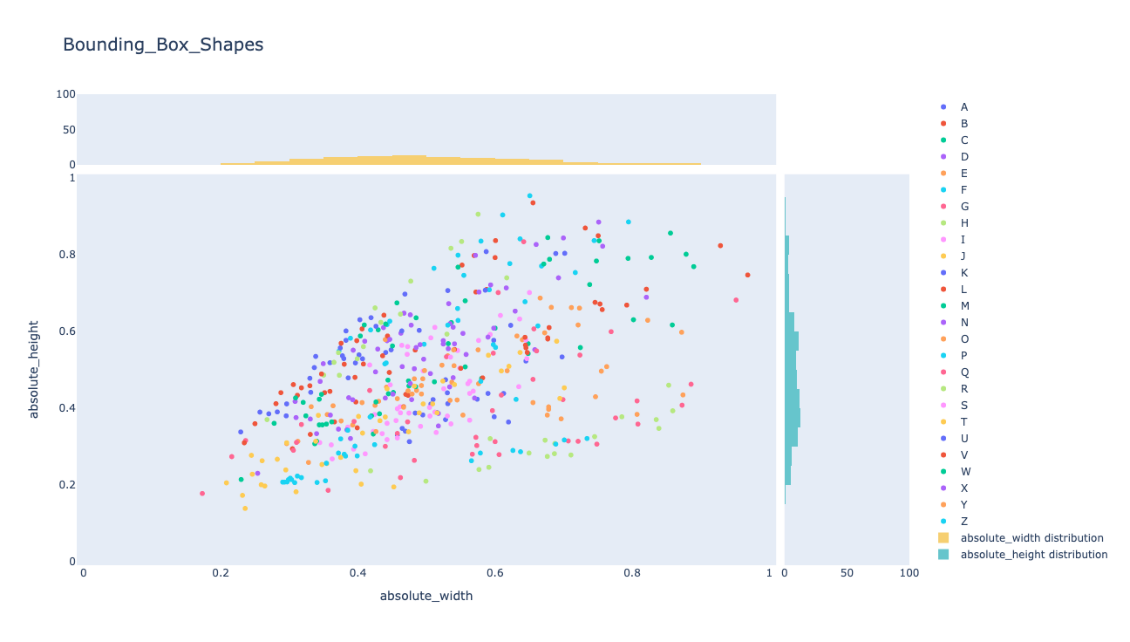

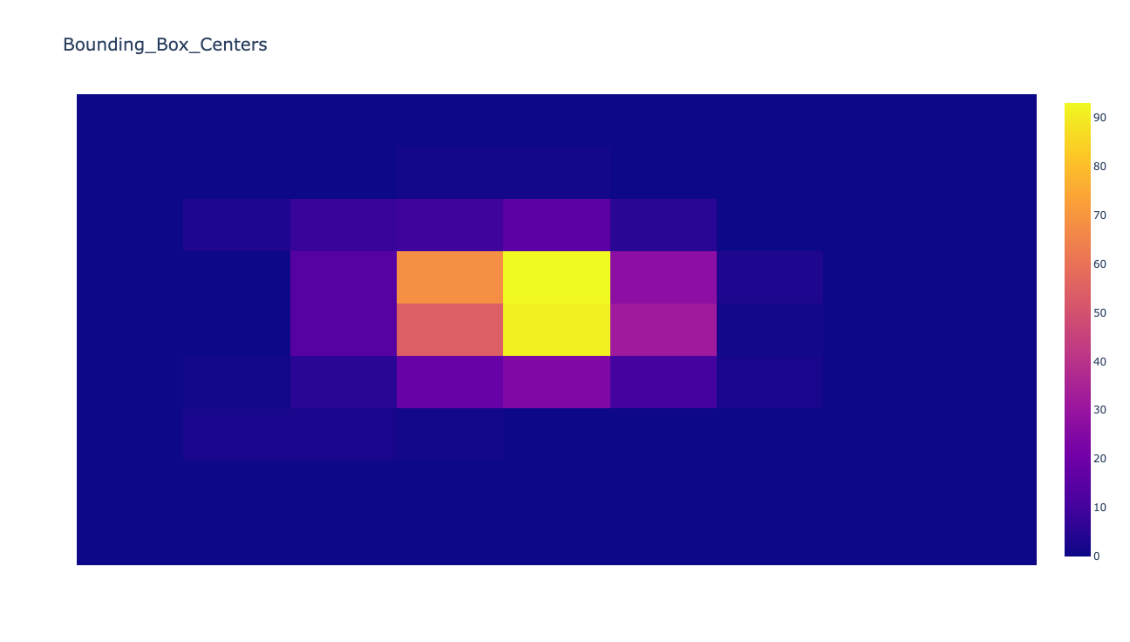

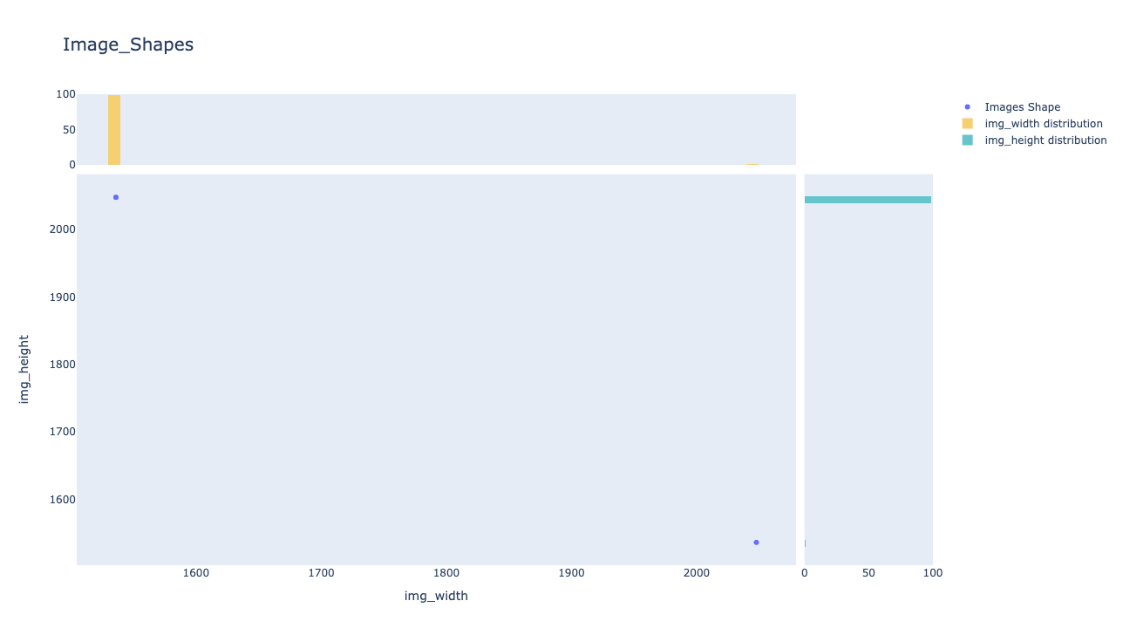

In [14]:
for p in (pyodi_save_dir / '_annotations.coco').glob('*.png'):
    stats = cv2.cvtColor(cv2.imread(str(p)), cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20, 15))
    plt.imshow(stats)
    plt.axis('off')
    plt.show()

In [ ]:
# Clean pyodi's output folder
shutil.rmtree(pyodi_save_dir)